# Blood Pressure

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


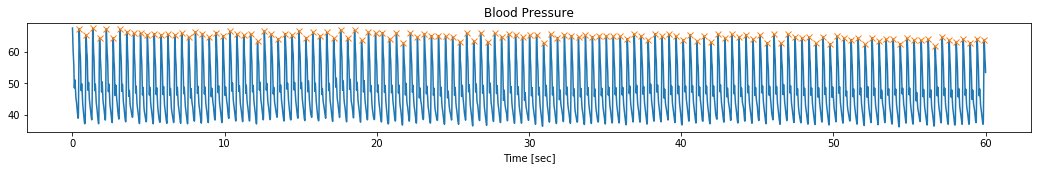

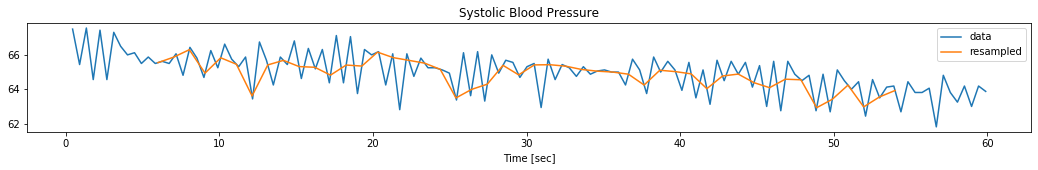

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


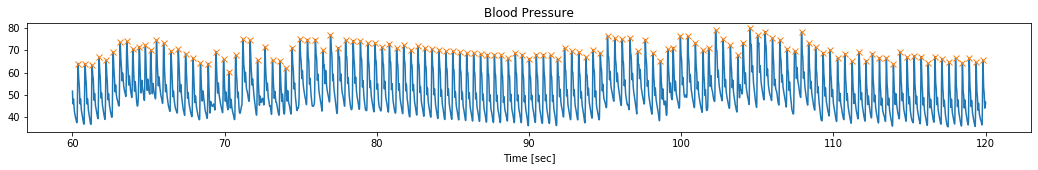

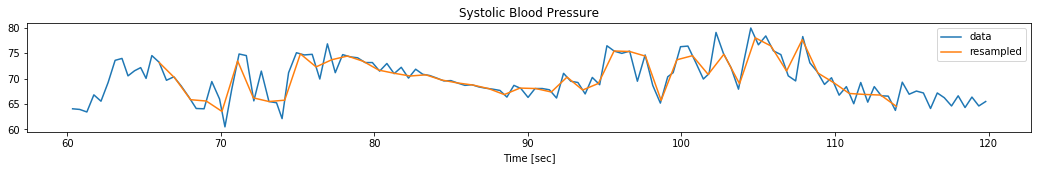

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


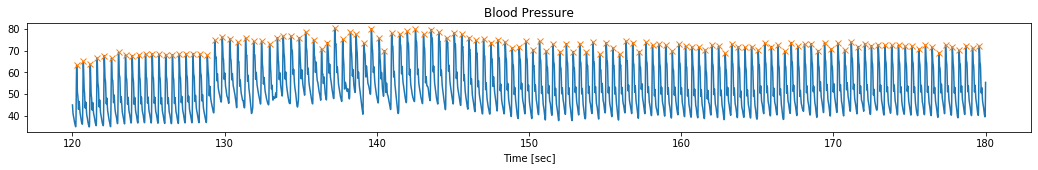

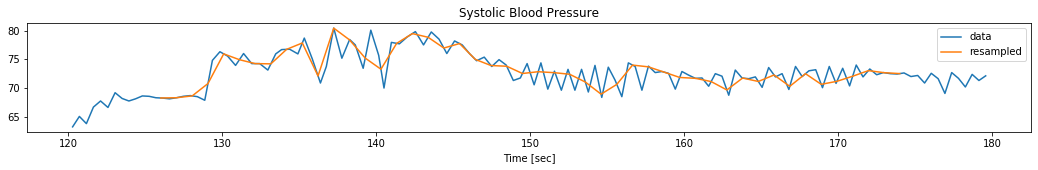

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


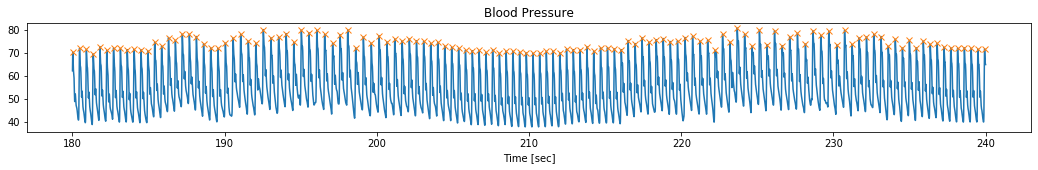

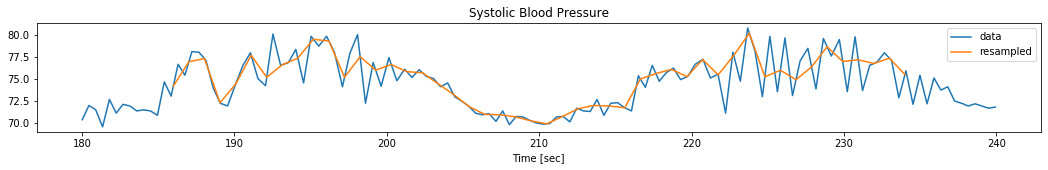

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


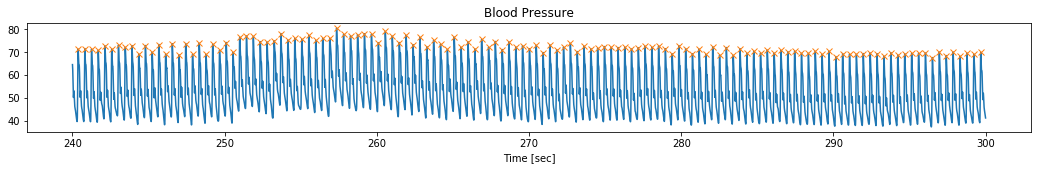

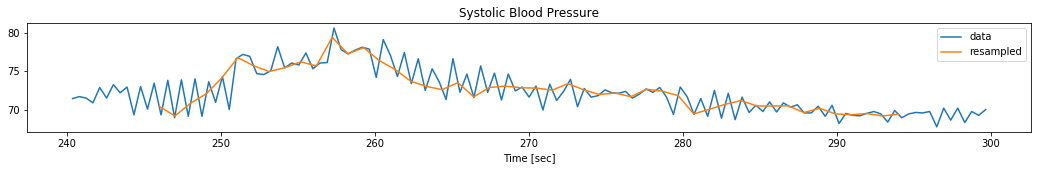

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


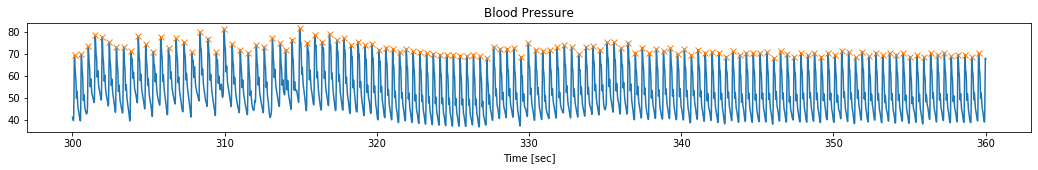

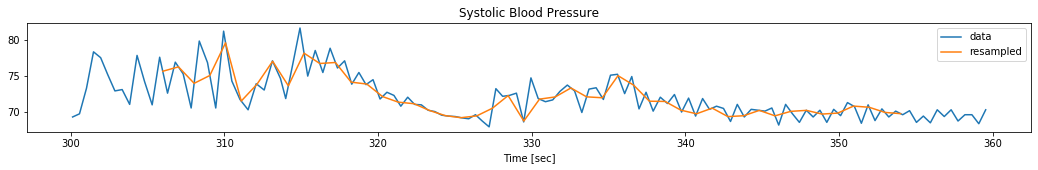

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


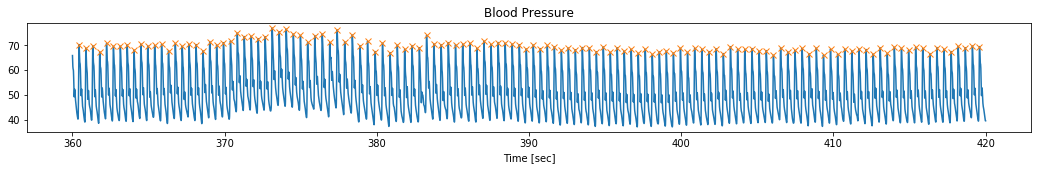

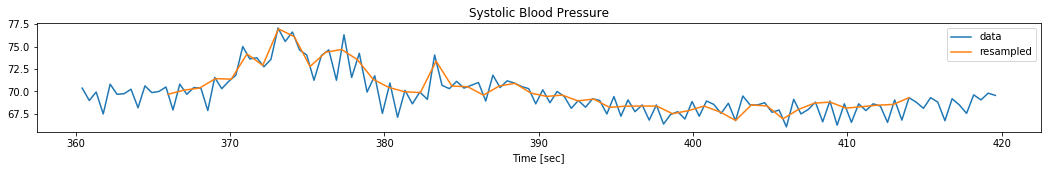

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


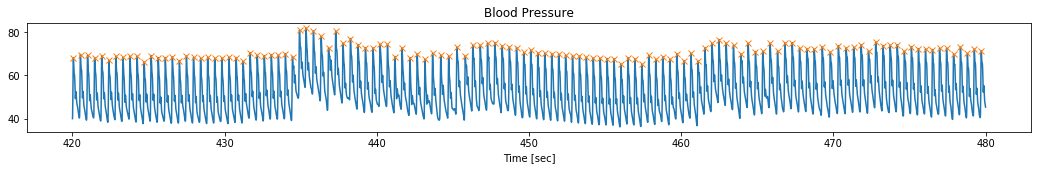

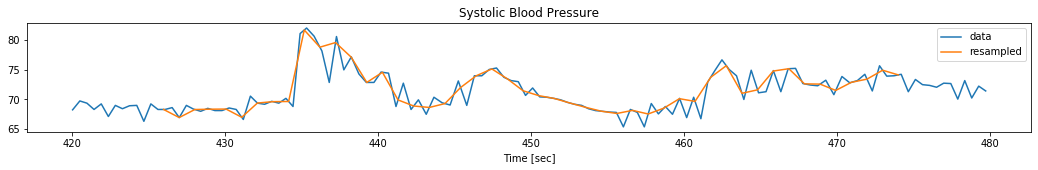

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


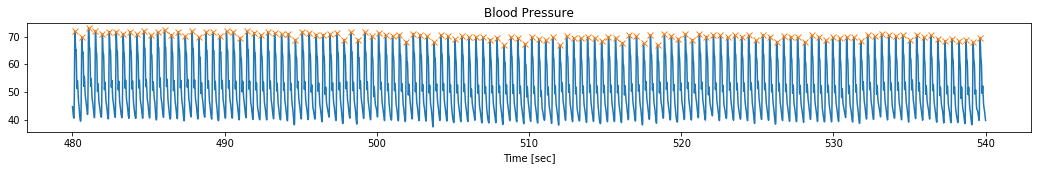

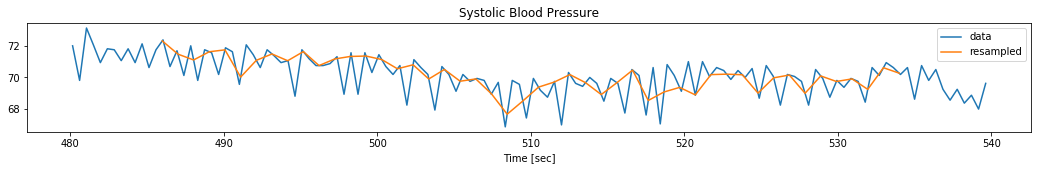

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


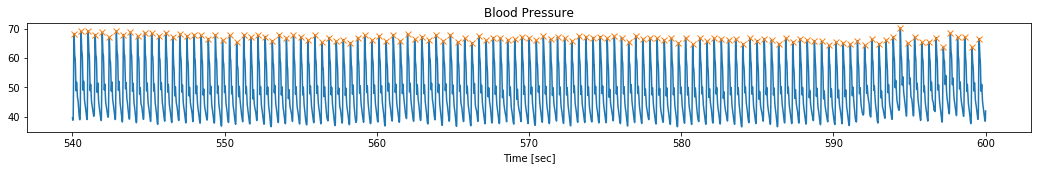

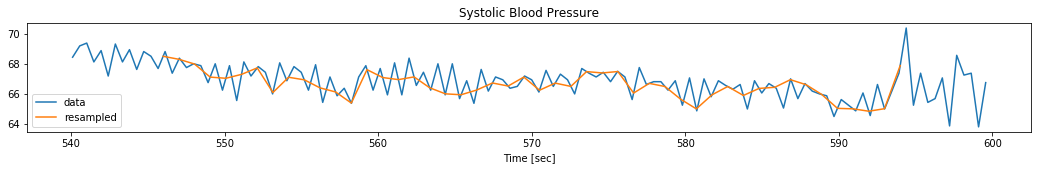

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


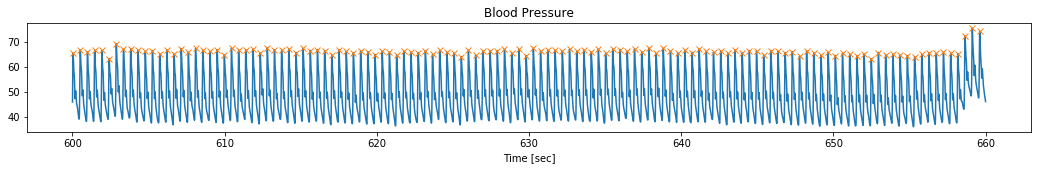

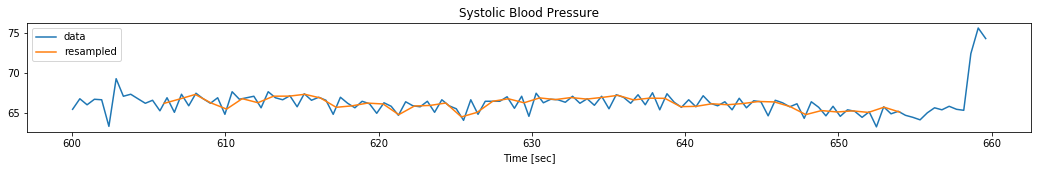

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


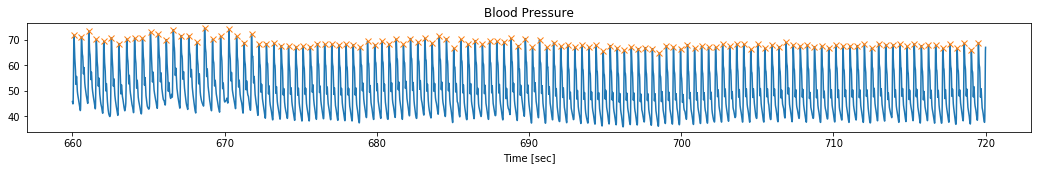

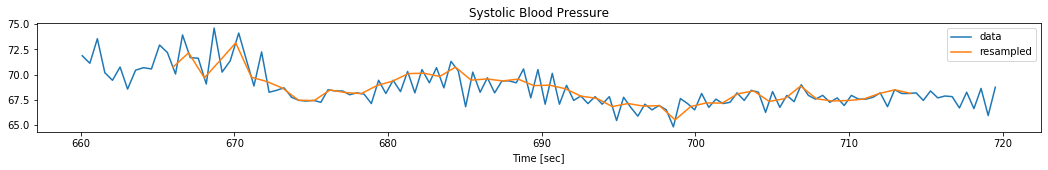

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


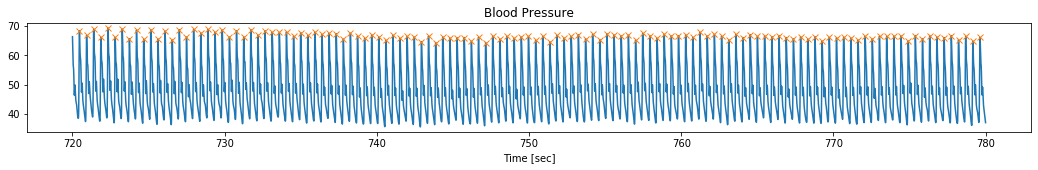

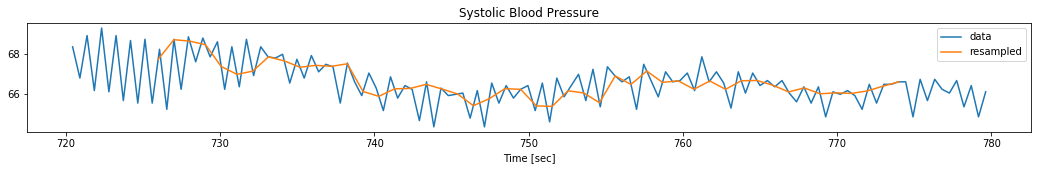

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:
sampling frequency is  1  Hz


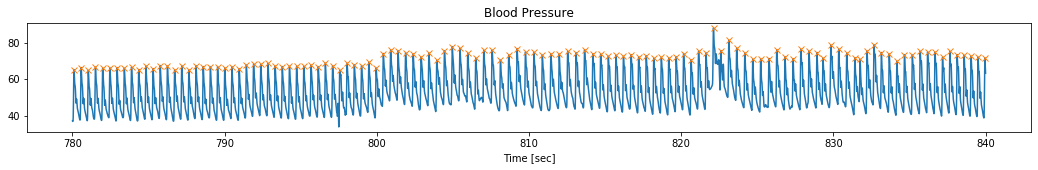

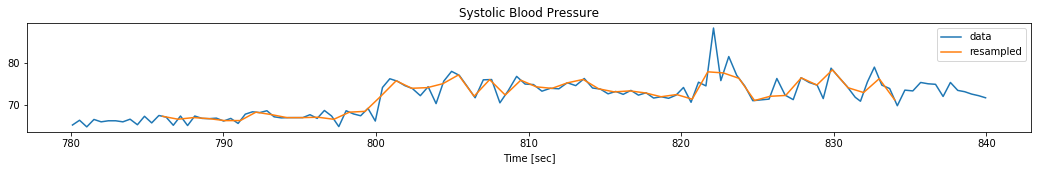

In [3]:
def bp(start, end, print1, print3):
    %run configuration.ipynb
    bp = []
    for filename in os.listdir('samples'):
        if "MDC_PRESS_BLD_ART_ABP-125" in filename: 
            if print1 or print3:
                print(filename+':')
                print("sampling frequency is ", F," Hz")
            with open('samples/'+ filename, 'r') as f:
                reader = csv.reader(f)
                for row in reader:
                    bp.append((0.0625*float(row[1]))-40)

                bp_small = np.array(bp[start*125:end*125])
                peaks,_= find_peaks(bp_small, prominence=1, distance=42)
                peaks_sec = (peaks + start*125) * 0.008
                sys = bp_small[peaks]
                time = np.arange(start, end, 0.008)

                if print1:
                    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                    plt.plot(time,bp_small)
                    plt.plot(peaks_sec, sys, "x")
                    plt.title('Blood Pressure')
                    plt.xlabel('Time [sec]')
                    plt.show()
                bp = []

                sys_interp_func = interp1d(peaks_sec, sys)
                time = np.linspace(start + MARGIN, end - MARGIN, F * (end - start -2*MARGIN))

                if print3:
                    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                    plt.plot(peaks_sec,sys) 
                    plt.plot(time,sys_interp_func(time))
                    plt.title('Systolic Blood Pressure')
                    plt.xlabel('Time [sec]')
                    plt.legend(['data', 'resampled'], loc='best')
                    plt.show()
                
                return time, sys_interp_func(time)
'''            
for i in range(14):
    bp(i*60, (1+i)*60, 1, 1)
'''
